# Digit Recognization with the help of CNN keras

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot  as plt
import tensorflow as tf
from tensorflow import keras
from keras.utils.np_utils import to_categorical 

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, Activation, MaxPooling2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

from sklearn.model_selection import train_test_split

# Loading the data

In [2]:
train_data = pd.read_csv(r"digits/train.csv")
test_data = pd.read_csv(r"digits/test.csv")

# Preprocessing of data

In [3]:
X_train = train_data.drop(['label'],axis = 1)

In [4]:
y_train = train_data.label

In [5]:
del train_data

In [6]:
#Converting y_train into a numpy array
y_train = np.array(y_train)


Label Encoding

In [7]:
y_train = to_categorical(y_train, num_classes = 10)

In [8]:
y_train.shape

(42000, 10)

Scaling the data 

In [9]:
X_train = X_train / 255
test_data = test_data / 255

Reshaping data into (28,28) pixels grayscale

In [10]:
X_train = X_train.values.reshape(-1,28,28,1)
test = test_data.values.reshape(-1,28,28,1)

Spliting the data into train and validation part

In [11]:
# Split the train and the validation set for the fitting
X_train, X_val, y_train, y_bal = train_test_split(X_train, y_train, test_size = 0.1)

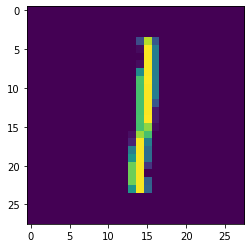

In [12]:
plt.imshow(X_train[56])

Augmenting data to prevent from overfitting

In [13]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train) #fitting the imagedatagenerator that we created by training data


##### 

# Building the model 

In [48]:
model = Sequential()
    
model.add(Conv2D(32,(6,6), input_shape = (28,28,1) ))
model.add(Activation ('relu'))

model.add(Conv2D(32,(6,6)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size =(2,2)))
model.add(Dropout(.20))


model.add(Conv2D(64,(4,4)))
model.add(Activation('relu'))
model.add(Dropout(.20))

model.add(Conv2D(64,(4,4)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size =(2,2)))
model.add(Dropout(.20))


    
model.add(Flatten())
model.add(Dense(250)) 
model.add(Activation('relu'))
model.add(Dropout(.20))
          
model.add(Dense(10))
model.add(Activation('softmax'))

# Compiling the model

In [49]:
model.compile(
             loss = 'categorical_crossentropy',
             optimizer = RMSprop(lr=0.001),
             metrics = ['accuracy'])


Reducing the learning rate

This method is actually used to adjust the learning rate based on the base result.
If accuracy is not improving for n numbers( patience=3) of steps then adjust the learning rate.
Here i put patience = 3 and learning rate will be decreasing to half(factor = .5).

In [50]:

learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

# Training the model

In [51]:
model.fit(datagen.flow(X_train,y_train, batch_size = 70),
          epochs = 6,
          
          validation_data = (X_val, y_bal),
          callbacks = [learning_rate_reduction] )

Epoch 1/6
540/540 [==============================] - 216s 400ms/step - loss: 0.5889 - accuracy: 0.8116 - val_loss: 0.0864 - val_accuracy: 0.9736
Epoch 2/6
540/540 [==============================] - 230s 426ms/step - loss: 0.1755 - accuracy: 0.9499 - val_loss: 0.0420 - val_accuracy: 0.9881
Epoch 3/6
540/540 [==============================] - 229s 425ms/step - loss: 0.1222 - accuracy: 0.9649 - val_loss: 0.0447 - val_accuracy: 0.9893
Epoch 4/6
540/540 [==============================] - 228s 423ms/step - loss: 0.1035 - accuracy: 0.9706 - val_loss: 0.0407 - val_accuracy: 0.9893
Epoch 5/6
540/540 [==============================] - 245s 454ms/step - loss: 0.0930 - accuracy: 0.9746 - val_loss: 0.0411 - val_accuracy: 0.9900
Epoch 6/6
540/540 [==============================] - 261s 483ms/step - loss: 0.0863 - accuracy: 0.9769 - val_loss: 0.0312 - val_accuracy: 0.9924


Model summery

In [ ]:
model.summary()

# Prediction

In [ ]:
pred = model.predict(test)

In [ ]:
pred = np.argmax(pred,axis = 1)

Submitting the result

In [ ]:
Submission = pd.DataFrame(pred,columns = ['Label'])

In [ ]:
Submission

In [ ]:
x= np.arange(1,28001)

In [ ]:
x = pd.DataFrame(x, columns = ['ImageId'])

In [ ]:
Submission = pd.concat([x,Submission],axis = 1)

In [ ]:
Submission.to_csv('Sub.csv',index = False)

In [ ]:
#Data augmentation to prevent overfitting
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    
            horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

#datagen.fit(X_train)
train_data=datagen.flow(x_train, y_train, batch_size=32)

In [ ]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))
